In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
dataset = pd.read_csv('datasets/salary.csv')

In [3]:

print(dataset.shape)
print(dataset.head(5))
print(dataset.tail(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
       age  education.num  capital.gain  hours.per.week income
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K


In [4]:
#mapping the the target feature to binary value
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [5]:
X = dataset.drop(columns=['income'] ,axis=1)
print(X)

       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
32556   22             10             0              40
32557   27             12             0              38
32558   40              9             0              40
32559   58              9             0              40
32560   22              9             0              20

[32561 rows x 4 columns]


In [6]:
y = dataset['income']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32


In [7]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

Text(0, 0.5, 'Mean Error')

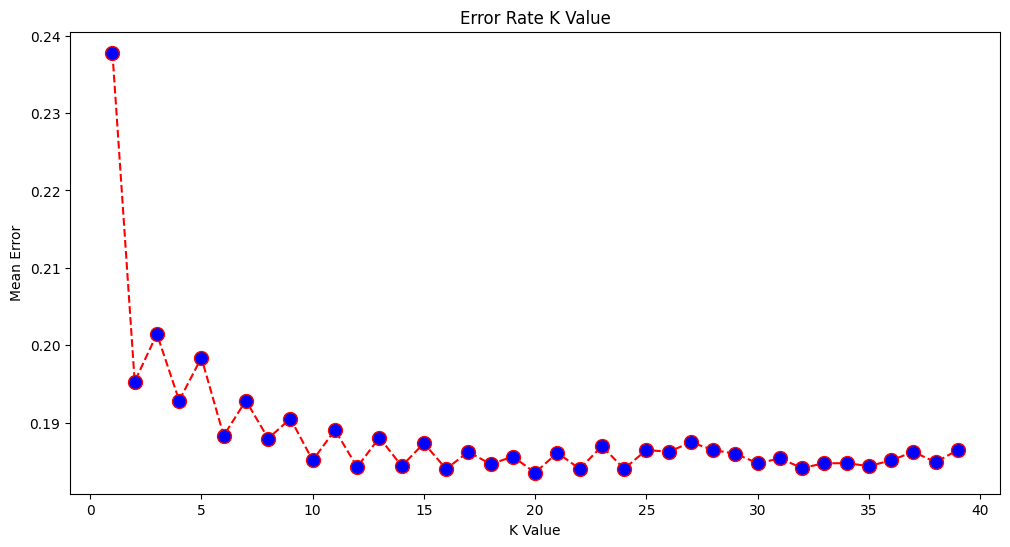

In [9]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [10]:
# Training

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = int(np.sqrt(X_train.shape[0]))
model = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=156)

In [11]:

y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred ,labels= model.classes_)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5894  299]
 [1209  739]]
Accuracy of the Model: 81.47647709126643%


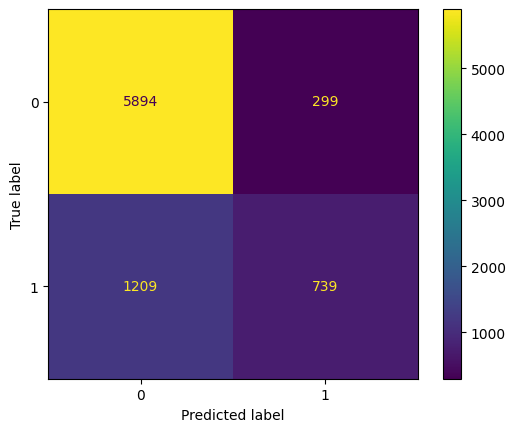

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [14]:
dataset.iloc[0]

age               90
education.num      9
capital.gain       0
hours.per.week    40
income             0
Name: 0, dtype: int64

In [16]:

age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Employee might not got  Salary above 50K")

[0]
Employee might not got  Salary above 50K


e:\Kunal_Barve_Task\ML_Tasks\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
